## Cross Matching with Halpha Observations - NOAO 2018A ##



In [3]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from astropy.io import fits
from astropy.coordinates import SkyCoord
from astropy import units as u
import warnings
warnings.filterwarnings('ignore')

from astropy.coordinates import ICRS, SkyCoord
from astropy import units as u

virgo_redshift = 0.0036 # from NED
dist_mod = 5.*np.log10(virgo_redshift*3.e5/70.*1.e6)-5

//anaconda/envs/astroconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [64]:
tablepath = '/Users/rfinn/github/Virgo/tables/'
nsafile=tablepath+'NSA_virgo.fits'
nsa=fits.getdata(nsafile)
# read in WISE catalog
wisefile=tablepath+'WISE_virgo.fits'
wise=fits.getdata(wisefile)
# read in John's stellar masses
massfile=tablepath+'StellarMasstoNSA_virgo.fits'
jmass=fits.getdata(massfile)

nsadict=dict((a,b) for a,b in zip(nsa.NSAID,np.arange(len(nsa.NSAID))))

## Match to Francoise's CO Tables ##

In [60]:
co = fits.getdata('/Users/rfinn/github/Virgo/tables/CO-MasterFile-2017Oct01.fits')

In [162]:
# match CO catalog to NSA
nsacat = SkyCoord(nsa.RA*u.degree,nsa.DEC*u.degree,frame='icrs')
COcat = SkyCoord(co.RA*u.degree,co.DEC*u.degree,frame='icrs')
index,dist2d,dist3d = nsacat.match_to_catalog_sky(COcat)
# only keep matches with matched RA and Dec w/in 10 arcsec
COflag = dist2d.degree < 10./3600# keep sources with matches w/in 10 arcsec
matchedCO10=np.zeros(len(nsa),dtype=co.dtype)
matchedCO10[COflag] = co[index[COflag]]
print len(COflag), sum(COflag)
codetect_flag = matchedCO10['CO_DETECT'] ==1

4944 185


## Get Halpha Data Table ##
* download Halpha data table from google drive as csv
    * mv ~/Downloads/Observing-Summary-Halpha\ -\ Sheet1.csv Observing-Summary-Halpha.csv

In [62]:
ha = np.recfromcsv('/Users/rfinn/github/Virgo/tables/Observing-Summary-Halpha.csv',delimiter=',')

In [65]:
ha_flag = np.zeros(len(nsa.RA),'bool')
ha_index = np.zeros(len(nsa.RA),'i')
for i in range(len(ha['nsa_id'])): 
    try:
        ha_flag[nsadict[ha['nsa_id'][i]]] = 1
        ha_index[nsadict[ha['nsa_id'][i]]] = i
    except KeyError:
        print('no match for ',ha['nsa_id'][i])

('no match for ', 90371)
('no match for ', -1)


In [68]:
matched_ha=np.zeros(len(nsa),dtype=ha.dtype)
matched_ha[ha_flag] = ha[ha_index[ha_flag]]

## Define Filaments! ##

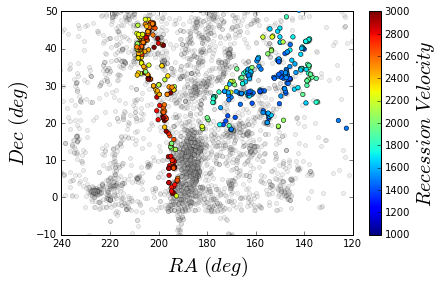

In [73]:
plt.figure()

plt.plot(nsa.RA,nsa.DEC,'ko',c='0.7',markersize=4,alpha=0.2)
# NGC5353/4 Filament
radec = (nsa.RA > 192.) & (nsa.RA < 209) & (nsa.DEC > 0.) & (nsa.DEC < 50.) 
radec_flag = radec & (nsa.DEC >(2*(nsa.RA - 205.) + 20) ) & (nsa.DEC < (2*(nsa.RA - 205.) + 55))
filament = radec_flag & (nsa.Z*3.e5 >2000.) & (nsa.Z*3.e5 < 3238.)
plt.scatter(nsa.RA[filament],nsa.DEC[filament],c=nsa.Z[filament]*3.e5,zorder=20,s=20,vmin=1000,vmax=3000,lw=0.5)
xl = np.linspace(196,230,100)
yl = (2*(xl - 205.) + 20)
#plt.plot(xl,yl,'r-')
NGCfilament = filament

yl = (1.8*(xl - 205.) + 50)
#plt.plot(xl,yl,'r-')

# Kim Canes Venatici Filament
radec_vflag = (nsa.DEC >= 30.) * (nsa.DEC < 45.) * (nsa.RA > 190) & (nsa.RA < 204) 
filament3 = radec_vflag * (nsa.Z*3.e5 >=  1100) *  (nsa.Z*3.e5 <= 1400)
#plt.scatter(nsa.RA[filament3],nsa.DEC[filament3],c=nsa.Z[filament3]*3.e5,zorder=20,s=20,vmin=1000,vmax=3000,lw=.5)
CVfilament = filament3

# filament 3 - this does not correspond to one of the filaments in Kim+2016
radec_vflag = (nsa.DEC >= 25.) * (nsa.RA < 185) * (nsa.DEC > -0.8 * nsa.RA + 170.) 
filament3 = radec_vflag * (nsa.Z*3.e5 >=  1500) *  (nsa.Z*3.e5 <= 2300)
#plt.scatter(nsa.RA[filament3],nsa.DEC[filament3],c=nsa.Z[filament3]*3.e5,zorder=20,s=20,vmin=1000,vmax=3000,lw=.5)


# filament - Leo Filaments
radec_vflag = (nsa.DEC >= 18.) * (nsa.RA < 185.) * (nsa.DEC <= -0.8 * nsa.RA + 170.) 
filament4 = radec_vflag * (nsa.Z*3.e5 >=  1400) *  (nsa.Z*3.e5 <= 2300)
plt.scatter(nsa.RA[filament4],nsa.DEC[filament4],c=nsa.Z[filament4]*3.e5,zorder=20,s=20,vmin=1000,vmax=3000,lw=0.5)

LEOfilament = filament4
# Virgo III Filament
radec_vflag = (nsa.RA < 232.) & (nsa.RA > 203)& (nsa.DEC >= 0.) & (nsa.DEC < 9.) 
radec = radec_vflag & (nsa.DEC < (-.2*(nsa.RA - 220.) + 7))
filament4 = radec & (nsa.Z*3.e5 >=  1200) &  (nsa.Z*3.e5 <= 2190)
#plt.scatter(nsa.RA[filament4],nsa.DEC[filament4],c=nsa.Z[filament4]*3.e5,zorder=20,s=20,vmin=1000,vmax=3000,lw=0.5)
xl = np.linspace(190,230,100)
yl = (-.2*(xl - 220.) + 7)
#plt.plot(xl,yl,'r-')
V3filament = filament4

#allfilaments = NGCfilament | CVfilament | LEOfilament | V3filament

allfilaments = NGCfilament | CVfilament  | V3filament | LEOfilament
allfilaments_masscut = allfilaments & (jmass.MSTAR_50 > 8.5)
halphafilaments = NGCfilament | LEOfilament #&  (jmass.MSTAR_50 > 8.)

plt.axis([120,240,-10,50])
plt.gca().invert_xaxis()
cb=plt.colorbar(fraction=.08)
cb.set_label('$Recession \ Velocity$',size=20)
#plt.axis('equal')
plt.xlabel('$RA  \ (deg)$',fontsize=20)
plt.ylabel('$Dec \ (deg)$',fontsize=20)

## Zoom in on NGC Filament ##

number of sources for 2018 =  45


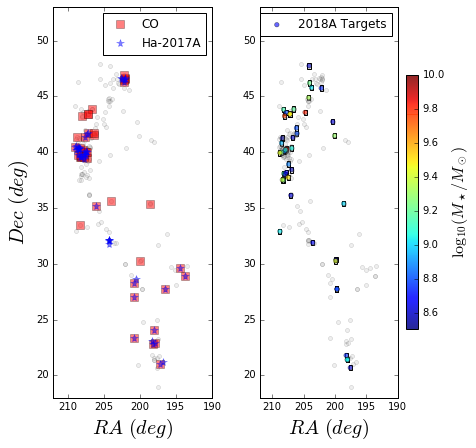

In [209]:
fig = plt.figure(figsize=(7,7))
plt.subplots_adjust(hspace=.2,wspace=.3,right=.85)
plt.subplot(1,2,1)

plt.plot(nsa.RA[NGCfilament],nsa.DEC[NGCfilament],'ko',c='0.7',markersize=4,alpha=0.2)
plt.axis([190,212,18,53])
plt.gca().invert_xaxis()
flag = NGCfilament & codetect_flag
plt.plot(nsa.RA[flag],nsa.DEC[flag],'rs',mfc=None,mec='k',markersize=8,alpha=0.5,label='CO')
plt.plot(nsa.RA[NGCfilament & ha_flag],nsa.DEC[NGCfilament & ha_flag],'b*',mfc=None,mec='b',markersize=8,alpha=0.5,label='Ha-2017A')
plt.xlabel('$RA  \ (deg)$',fontsize=20)
plt.ylabel('$Dec \ (deg)$',fontsize=20)
plt.legend(numpoints=1)
plt.subplot(1,2,2)
plt.plot(nsa.RA[NGCfilament],nsa.DEC[NGCfilament],'ko',c='0.7',markersize=4,alpha=0.2)
#plt.axis([204,212,39,41])
plt.axis([190,212,18,53])
plt.gca().invert_xaxis()
#plt.plot(nsa.RA[NGCfilament & COflag],nsa.DEC[NGCfilament & COflag],'rs',mfc=None,mec='r',markersize=8,alpha=0.2,label='CO')
#plt.plot(nsa.RA[NGCfilament & ha_flag],nsa.DEC[NGCfilament & ha_flag],'b*',mfc=None,mec='b',markersize=8,alpha=0.2,label='Ha')
plt.xlabel('$RA  \ (deg)$',fontsize=20)
#plt.ylabel('$Dec \ (deg)$',fontsize=20)
plt.legend(numpoints=1)
flag = NGCfilament & (jmass.MSTAR_50 > 8.5) & (jmass.MSTAR_50 < 10) & ~ha_flag & (nsa.SERSIC_BA > .25) & (nsa.DEC > 20)
print 'number of sources for 2018 = ',sum(flag)
plt.scatter(nsa.RA[flag],nsa.DEC[flag],c=jmass.MSTAR_50[flag],zorder=20,s=20,vmin=8.5,vmax=10,lw=0.5,alpha=.6,label='2018A Targets')
cb=plt.colorbar(fraction=.08)
ra = nsa.RA[flag]
dec = nsa.DEC[flag]
for i in range(len(ra)):
    rect= plt.Rectangle((ra[i]-.25,dec[i]-.25), .5, .5,fill=False, color='k')
    #rect= plt.Rectangle((ra[i]-.25,dec[i]-.25), .5, .5,fill=False, color='k')
    fig.gca().add_artist(rect)
plt.legend(numpoints=1,scatterpoints=1)
cb.set_label('$\log_{10}(M_\star/M_\odot)$',size=16)
plt.savefig('/Users/rfinn/proposals/observing/NOAO2018A/noao2018a-targets.eps')

number of sources for 2018 =  45


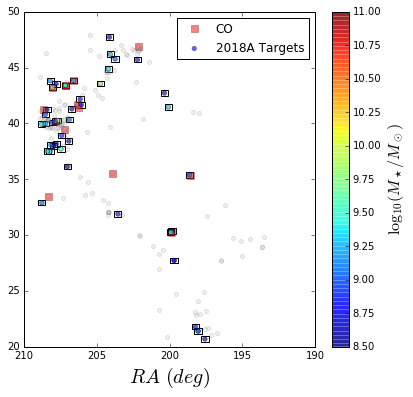

In [182]:
fig = plt.figure(figsize=(6,6))
flag = NGCfilament & codetect_flag & ~ha_flag
plt.plot(nsa.RA[flag],nsa.DEC[flag],'rs',mfc=None,mec='k',markersize=7,alpha=0.5,label='CO')
flag = NGCfilament & (jmass.MSTAR_50 > 8.5) & ~ha_flag & (nsa.SERSIC_BA > .5) & (nsa.DEC > 20)
plt.plot(nsa.RA[NGCfilament],nsa.DEC[NGCfilament],'ko',c='0.7',markersize=4,alpha=0.2)
#plt.axis([204,212,39,41])

plt.gca().invert_xaxis()
#plt.plot(nsa.RA[NGCfilament & COflag],nsa.DEC[NGCfilament & COflag],'rs',mfc=None,mec='r',markersize=8,alpha=0.2,label='CO')
#plt.plot(nsa.RA[NGCfilament & ha_flag],nsa.DEC[NGCfilament & ha_flag],'b*',mfc=None,mec='b',markersize=8,alpha=0.2,label='Ha')
plt.xlabel('$RA  \ (deg)$',fontsize=20)
#plt.ylabel('$Dec \ (deg)$',fontsize=20)
plt.legend(numpoints=1)
flag = NGCfilament & (jmass.MSTAR_50 > 8.5) & (jmass.MSTAR_50 < 10)& ~ha_flag & (nsa.SERSIC_BA > .25) & (nsa.DEC > 20)
print 'number of sources for 2018 = ',sum(flag)
plt.scatter(nsa.RA[flag],nsa.DEC[flag],c=jmass.MSTAR_50[flag],zorder=20,s=20,vmin=8.5,vmax=11,lw=0.5,alpha=.6,label='2018A Targets')
cb=plt.colorbar(fraction=.08)

ra = nsa.RA[flag]
dec = nsa.DEC[flag]
for i in range(len(ra)):
    rect= plt.Rectangle((ra[i]-.25,dec[i]-.25), .5, .5,fill=False, color='k')
    #rect= plt.Rectangle((ra[i]-.25,dec[i]-.25), .5, .5,fill=False, color='k')
    fig.gca().add_artist(rect)
plt.legend(numpoints=1,scatterpoints=1)
cb.set_label('$\log_{10}(M_\star/M_\odot)$',size=16)
# plt.axis([204,210,36,48]) # group center
# plt.axis([198,203,28,32])
plt.axis([190,210,20,50])
plt.gca().invert_xaxis()

### Print out coordinates for the observing proposal ###

In [208]:
flag = NGCfilament & (jmass.MSTAR_50 > 8.5) & (jmass.MSTAR_50 < 10)& ~ha_flag & (nsa.SERSIC_BA > .25) & (nsa.DEC > 20)
ra = nsa.RA[flag]
dec = nsa.DEC[flag]
name = nsa.IAUNAME[flag]
nsacat = SkyCoord(ra*u.degree,dec*u.degree,frame='icrs')
outfile = open('/Users/rfinn/proposals/observing/NOAO2018A/coords.txt','w')
for i in range(len(ra)):
    outfile.write('%s12 \t J2000 \t %2i:%02i:%02d \t +%02i:%02i:%02d \n'%(name[i],nsacat.ra[i].hms[0],nsacat.ra[i].hms[1],nsacat.ra[i].hms[2],nsacat.dec[i].dms[0],nsacat.dec[i].dms[1],nsacat.dec[i].dms[2]) )
outfile.close()